# Lab 8: Define and Solve an ML Problem of Your Choosing

In [60]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [74]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv") 
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv") 
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)# YOUR CODE HERE

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>
1. World Happiness Report (WHR)

2. Label: life-ladder

3. This will be a supervised learning continuous regression probelm.

4. Features of WHR dataset: 'country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year'

5. Predicting the life ladder score is valuable for companies, especially those focused on social impact or consumer behavior. Happiness correlates with spending habits and consumer needs. Companies can use the data predicted by the model to target areas with lower well-being, tailoring their products or services to meet local needs better and improve quality of life.

   For social impact companies, the model can identify where impactful programs should be prioritized and resources should be distributed, while enabling continuous monitoring of intervention outcomes. Organizations can determine whether their efforts contribute positively to community well-being or if adjustments are needed by observing changes in the model over time. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [62]:
# YOUR CODE HERE

new_names_dict = {'Life Ladder': 'Happiness',
                  'Log GDP per capita': 'LogGDP',
                  'Social support': 'Support',
                  'Healthy life expectancy at birth': 'Life',
                  'Freedom to make life choices': 'Freedom',
                  'Perceptions of corruption': 'Corruption',
                  'gini of household income reported in Gallup, by wp5-year': 'gini of household income'}
df.rename(columns = new_names_dict, inplace = True)
df = df.drop(columns = ['country', 'year', 'GINI index (World Bank estimate), average 2000-15', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'Positive affect', 'Negative affect', 'GINI index (World Bank estimate)'])
df.columns

Index(['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity',
       'Corruption', 'Confidence in national government', 'Democratic Quality',
       'gini of household income'],
      dtype='object')

In [63]:
#dealing with missing data
nan_count = np.sum(df.isnull(), axis=0)
nan_count

Happiness                              0
LogGDP                                27
Support                               13
Life                                   9
Freedom                               29
Generosity                            80
Corruption                            90
Confidence in national government    161
Democratic Quality                   171
gini of household income             357
dtype: int64

In [64]:
df = df.dropna()
np.sum(df.isnull(), axis=0)

Happiness                            0
LogGDP                               0
Support                              0
Life                                 0
Freedom                              0
Generosity                           0
Corruption                           0
Confidence in national government    0
Democratic Quality                   0
gini of household income             0
dtype: int64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

<b>New Feature List:</b> 'Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption', 'Confidence in national government', 'Democratic Quality', 'gini of household income'

<b>Removed:</b> 'country', 'year', 'GINI index (World Bank estimate), average 2000-15', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'Positive affect', 'Negative affect', 'GINI index (World Bank estimate)'

After discussing with my lab group, we determined these features should be removed from our data set, because it does not hold significant predictive value into the model. 

<b>Data Preparation:</b> Our data preparation process was minimal but essential. First, we selected the features that would be used in the model and removed those that didn't hold significant predictive value. Next, we renamed certain features to make them shorter and easier to interpret. Finally, we cleaned the dataset by identifying missing values and removing rows containing them.

<b>Models:</b> Neural Network and Random Forest. We selected a Neural Network because we wanted a model that can consider both linear a non-linear patterns. I personally selected a Random Forest model because it produced the best results in Lab 6 of Train Various Regression Models and Compare Their Performances regarding R2 and RSME values.  

<b>Plan</b> We plan to adjust a standard neural network architecture for continuous regression tasks. We will experiment with different numbers of epochs and learning rates to identify the best-performing configuration. Based on previous assignments, we’ve observed that these two parameters, epochs and learning rate, have the most significant impact on model performance, particularly in terms of loss reduction.

Since this is a regression problem, accuracy is not a relevant evaluation metric. Instead, we will focus on minimizing loss values (Mean Squared Error or Mean Absolute Error) to ensure the model learns to make accurate predictions of the life ladder score.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [65]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [66]:
# YOUR CODE HERE
#Create Training and Test Data Sets
y = df['Happiness']
X = df.drop(columns = 'Happiness', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

X_train.shape

(668, 9)

In [67]:
#Constructing the Neural Network

nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape=(X_train.shape[1],))
nn_model.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)

output_layer = keras.layers.Dense(units=1)
nn_model.add(output_layer)

nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [68]:
#Compile the model
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_fn = keras.losses.MeanSquaredError()
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['mae'])

In [69]:
#Fit Model to Training Data
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

t0 = time.time()

num_epochs = 100

history = nn_model.fit(
    X_train,
    y_train,
    epochs = num_epochs,
    verbose=0, 
    validation_split = 0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]
)

t1 = time.time() 

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 100], Loss: 0.7466, Mae: 0.7065, Val_loss: 0.5991, Val_mae: 0.6396
Epoch [10/ 100], Loss: 0.6470, Mae: 0.6650, Val_loss: 0.6651, Val_mae: 0.6694
Epoch [15/ 100], Loss: 0.6783, Mae: 0.6726, Val_loss: 0.6706, Val_mae: 0.6718
Epoch [20/ 100], Loss: 0.5814, Mae: 0.6347, Val_loss: 0.6450, Val_mae: 0.6604
Epoch [25/ 100], Loss: 0.5996, Mae: 0.6418, Val_loss: 0.5952, Val_mae: 0.6357
Epoch [30/ 100], Loss: 0.5769, Mae: 0.6332, Val_loss: 0.6149, Val_mae: 0.6451
Epoch [35/ 100], Loss: 0.6445, Mae: 0.6607, Val_loss: 0.5922, Val_mae: 0.6348
Epoch [40/ 100], Loss: 0.6462, Mae: 0.6560, Val_loss: 0.6384, Val_mae: 0.6572
Epoch [45/ 100], Loss: 0.6288, Mae: 0.6563, Val_loss: 0.7107, Val_mae: 0.6888
Epoch [50/ 100], Loss: 0.6169, Mae: 0.6555, Val_loss: 0.6487, Val_mae: 0.6615
Epoch [55/ 100], Loss: 0.5820, Mae: 0.6379, Val_loss: 0.5881, Val_mae: 0.6316
Epoch [60/ 100], Loss: 0.5700, Mae: 0.6305, Val_loss: 0.5906, Val_mae: 0.6349
Epoch [65/ 100], Loss: 0.6051, Mae: 0.6426, Val_loss: 0.5863, Val

In [70]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

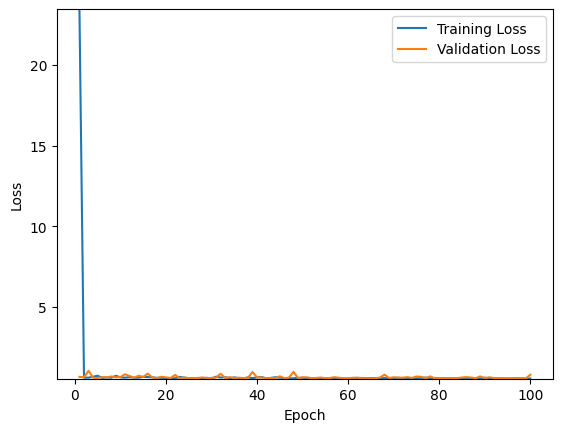

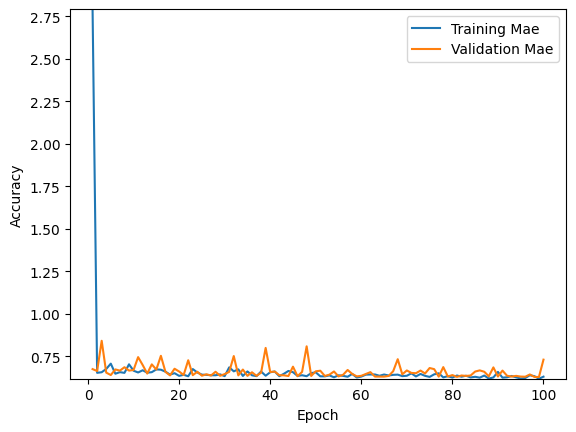

In [71]:
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.autoscale(enable=True, axis='y', tight=True)
plt.show()

plt.plot(range(1, num_epochs + 1), history.history['mae'], label='Training Mae')
plt.plot(range(1, num_epochs + 1), history.history['val_mae'], label='Validation Mae')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.autoscale(enable=True, axis='y', tight=True)
plt.show()


In [72]:
#Random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

X_train.shape

(596, 9)

In [73]:
print('Begin Random Forest Implementation...')
rf_model = RandomForestRegressor(max_depth = 32, n_estimators = 300)

rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)

rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

print('End')

Begin Random Forest Implementation...
[RF] Root Mean Squared Error: 0.4264605313848849
[RF] R2: 0.8675401622441059
End


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
